In [190]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier as KNN
import datetime as dt

In [2]:
ds = pd.read_csv('./mnist_data/train.csv')

In [3]:
print ds.shape
print ds.columns
ds.describe()

(42000, 785)
Index([u'label', u'pixel0', u'pixel1', u'pixel2', u'pixel3', u'pixel4',
       u'pixel5', u'pixel6', u'pixel7', u'pixel8',
       ...
       u'pixel774', u'pixel775', u'pixel776', u'pixel777', u'pixel778',
       u'pixel779', u'pixel780', u'pixel781', u'pixel782', u'pixel783'],
      dtype='object', length=785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000,42000,42000,42000
mean,4.456643,0,0,0,0,0,0,0,0,0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0,0,0,0
std,2.887730,0,0,0,0,0,0,0,0,0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0,0,0,0
min,0.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
25%,2.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
50%,4.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
75%,7.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
max,9.000000,0,0,0,0,0,0,0,0,0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0,0,0,0


In [55]:
y=ds.values[:,0]
x=ds.values[:,1:]

In [56]:
print x.shape

(42000, 784)


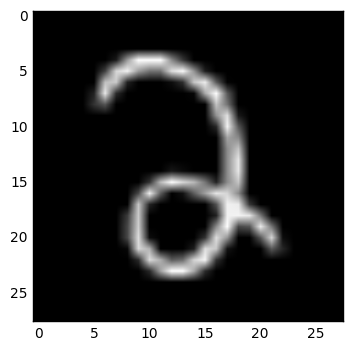

In [88]:
plt.figure(0) 
plt.imshow(x[4008,:].reshape(28,28),cmap='gray') 
plt.show()


In [172]:
x_train=x[:4000]
label=y[:4000]
x_test=x[4000:5000]
label_test=y[4000:5000]


In [173]:
def dist(a,b):
    return np.sqrt(((a-b)**2).sum())


In [174]:
def knn(x_train,label,x_test,k=3):
    list=[]
    for ix in range(x_test.shape[0]):
        distances=[]
        for iy in range(x_train.shape[0]):
            d=dist(x_test[ix],x_train[iy])
            distances.append([d,label[iy]])
        distances=sorted(distances)
        k_neighbours=np.asarray(distances)[:k]
        unique,neigh=np.unique(k_neighbours[:,1],return_counts=True)
        f=dict(zip(unique,neigh))
        list.append(f)
    return list 
            

In [175]:
flag=0.00
list=knn (x_train,label,x_test,k=3)
print len(list)

1000


In [170]:
print label_test[100]

5


In [178]:
flag=0.00
l=[]
for i in list:
     l.append(sorted(i.items(), key=lambda x:x[1]))
for ix in range(len(l)):
    if label_test[ix]==l[ix][-1][0]:
        flag=flag+1
print "Accuracy",flag/1000


Accuracy 0.933


In [200]:
knn=KNN(1)
start=dt.datetime.now()
knn.fit(x_train,label)
end =dt.datetime.now()
print "time= ",end-start
start=dt.datetime.now()
print knn.score(x_test,label_test)
end=dt.datetime.now()
print "time =",end-start

time=  0:00:00.122576
0.93
time = 0:00:06.795468
